# Encoder와 Decoder의 구조가 다른 비대칭형 뉴런수로 성능 확인

In [2]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

In [3]:
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model

df = pd.read_csv("C:/Users/Administrator/dataset/DSA_features.csv")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [4]:
# Null값 확인
df.isna().values.any()

False

In [5]:
np.unique(df['activity'], return_counts=True)

(array(['ascendingStairs', 'basketBall', 'crossTrainer',
        'cyclingHorizontal', 'cyclingVertical', 'decendingStairs',
        'jumping', 'lyingBack', 'lyingRigh', 'movingInElevator', 'rowing',
        'runningTreadmill', 'sitting', 'standing',
        'standingInElevatorStill', 'stepper', 'walkingLot',
        'walkingTreadmillFlat', 'walkingTreadmillIncline'], dtype=object),
 array([480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480,
        480, 480, 480, 480, 480, 480], dtype=int64))

In [6]:
# 필요한 데이터 필터링 (Lying = 정상, Sitting = 비정상)
df = df.loc[df['activity'].isin(['lyingRigh', 'lyingBack', 'jumping'])]
df['class'] = df['activity'].apply(lambda x: 'normal' if x.startswith('lying') else 'abnormal')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24612\21683065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = df['activity'].apply(lambda x: 'normal' if x.startswith('lying') else 'abnormal')


In [7]:
# 정상(normal) 데이터: lying 관련 활동
normal = df[df.activity.isin(['lyingRigh', 'lyingBack'])]

# 비정상(abnormal) 데이터: sitting
abnormal = df[df.activity == 'sitting']

In [8]:
# 특성과 레이블 정의
X_train = normal.drop(['activity', 'people'], axis=1)
X_mix = df.iloc[:, :-1].drop(['activity', 'people'], axis=1)
y_mix = df['class'].apply(lambda x: 0 if x == 'abnormal' else 1)

In [9]:
# 'activity'와 'class' 컬럼을 제외한 숫자형 컬럼만 선택
X_train = normal.drop(['activity', 'class', 'people'], axis=1)

In [10]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_mix = ss.transform(X_mix)

In [11]:
# 데이터프레임의 컬럼 확인
print(df.columns)

# 'class' 컬럼이 존재한다면 제거
X_mix = df.iloc[:, :-1].drop(['activity', 'people'], axis=1)  # 'class' 컬럼이 없다면 제거하지 않음
X_mix_scaled = ss.transform(X_mix)


Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max', 'LL_zmag_min',
       'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity', 'people',
       'class'],
      dtype='object', length=273)


In [12]:
# Linear Encoder 모델 생성
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [13]:
# 입력 차원 설정
input_dim = X_train.shape[1]

# AE 모델 정의 (Linear Encoder & Decoder)
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
bottleneck = Dense(16, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(bottleneck)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

# 모델 인스턴스 생성
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# 모델 컴파일
autoencoder.compile(optimizer=Adam(), loss='mse')

# 모델 요약
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 270)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          34,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 270)                 │          34,830 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,358 (356.87 KB)

 Trainable params: 91,358 (356.87 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# 모델 훈련
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = autoencoder.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=32, 
                          shuffle=True, 
                          callbacks=[early_stopping_cb],
                          validation_split=0.1)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.4049 - val_loss: 0.7041
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0305 - val_loss: 0.6505
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9833 - val_loss: 0.6503
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8749 - val_loss: 0.6579
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4073 - val_loss: 0.6529


In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

def construct_model(input_dim, model_type='linear'):
    # 입력 레이어
    input_layer = Input(shape=(input_dim,))
    
    # 인코더 (Encoder) - 비선형 활성화 함수 사용
    if model_type == 'non-linear':
        encoded = Dense(128, activation='relu')(input_layer)  # 비선형 활성화 함수 사용
        encoded = Dense(64, activation='relu')(encoded)
    else:
        encoded = Dense(128, activation='linear')(input_layer)  # 선형 회귀 (기본값)
        encoded = Dense(64, activation='linear')(encoded)
    
    # 디코더 (Decoder)
    decoded = Dense(128, activation='relu')(encoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)  # 입력 차원으로 복원
    
    # 모델 정의
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    
    return autoencoder

# 모델 생성
input_dim = 271  # 예시로 입력 차원 설정 (이건 네 데이터에 맞게 수정)
autoencoder = construct_model(input_dim, 'non-linear')

# 모델 컴파일
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 모델 요약 출력
autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 271)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          34,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 271)                 │          34,959 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,351 (337.31 KB)

 Trainable params: 86,351 (337.31 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# 입력 차원을 X_train 데이터에 맞게 270으로 수정합니다.
input_dim = 270  # X_train의 실제 입력 차원에 맞추기

# 모델 다시 생성
autoencoder = construct_model(input_dim, 'non-linear')

# 모델 컴파일
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping 콜백 수정 (patience를 5로 설정해 조금 더 기다리도록 변경)
early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True)

# 모델 훈련
history = autoencoder.fit(
    X_train, X_train,  # 입력과 타겟이 동일
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_split=0.1,
    callbacks=[early_stopping_cb]  # 수정된 콜백 적용
)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2320 - val_loss: 0.6351
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8796 - val_loss: 0.5710
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6779 - val_loss: 0.5411
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9873 - val_loss: 0.5275
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6233 - val_loss: 0.5097
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8417 - val_loss: 0.5031
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7549 - val_loss: 0.4986
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8686 - val_loss: 0.4999
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9249 - val_loss: 0.4957
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7322 - val_loss: 0.4946
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8453 - val_loss: 0.4929
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9332 - val_lo

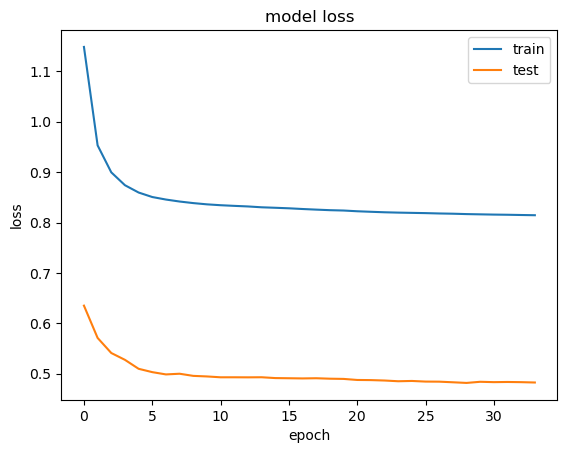

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');